In [1]:
%pip install gradio
import gradio as gr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.6 MB 4.8 MB/s 
     |████████████████████████████████| 84 kB 3.4 MB/s 
     |████████████████████████████████| 55 kB 3.5 MB/s 
     |████████████████████████████████| 272 kB 45.7 MB/s 
     |████████████████████████████████| 84 kB 3.6 MB/s 
     |████████████████████████████████| 56 kB 4.5 MB/s 
     |████████████████████████████████| 106 kB 64.3 MB/s 
     |████████████████████████████████| 213 kB 69.2 MB/s 
     |████████████████████████████████| 54 kB 2.9 MB/s 
     |████████████████████████████████| 2.3 MB 51.9 MB/s 
     |████████████████████████████████| 64 kB 2.2 MB/s 
     |████████████████████████████████| 80 kB 7.4 MB/s 
     |████████████████████████████████| 68 kB 5.9 MB/s 
     |████████████████████████████████| 46 kB 3.9 MB/s 
     |████████████████████████████████| 593 kB 17.3 MB/s 
     |████████████████████████████████| 856 kB 26

## HEART FAILURE PREDICTION

In [20]:
import numpy
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import*
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor

In [21]:
d=pd.read_csv("https://raw.githubusercontent.com/akarshsnair/Dataset-cart/main/heart.csv")
d.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [22]:
d.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [23]:
d.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [24]:
d.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [25]:
d['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

In [26]:
d.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [27]:
for col in d.columns:
    if d[col].dtype == 'object':
        d[col] = LabelEncoder().fit_transform(d[col])

d.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


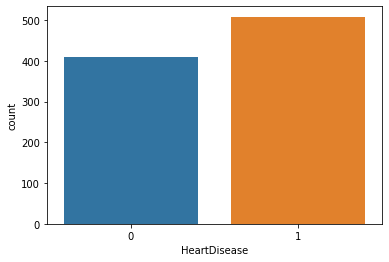

In [28]:
sns.countplot(d['HeartDisease'],label="count")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor 

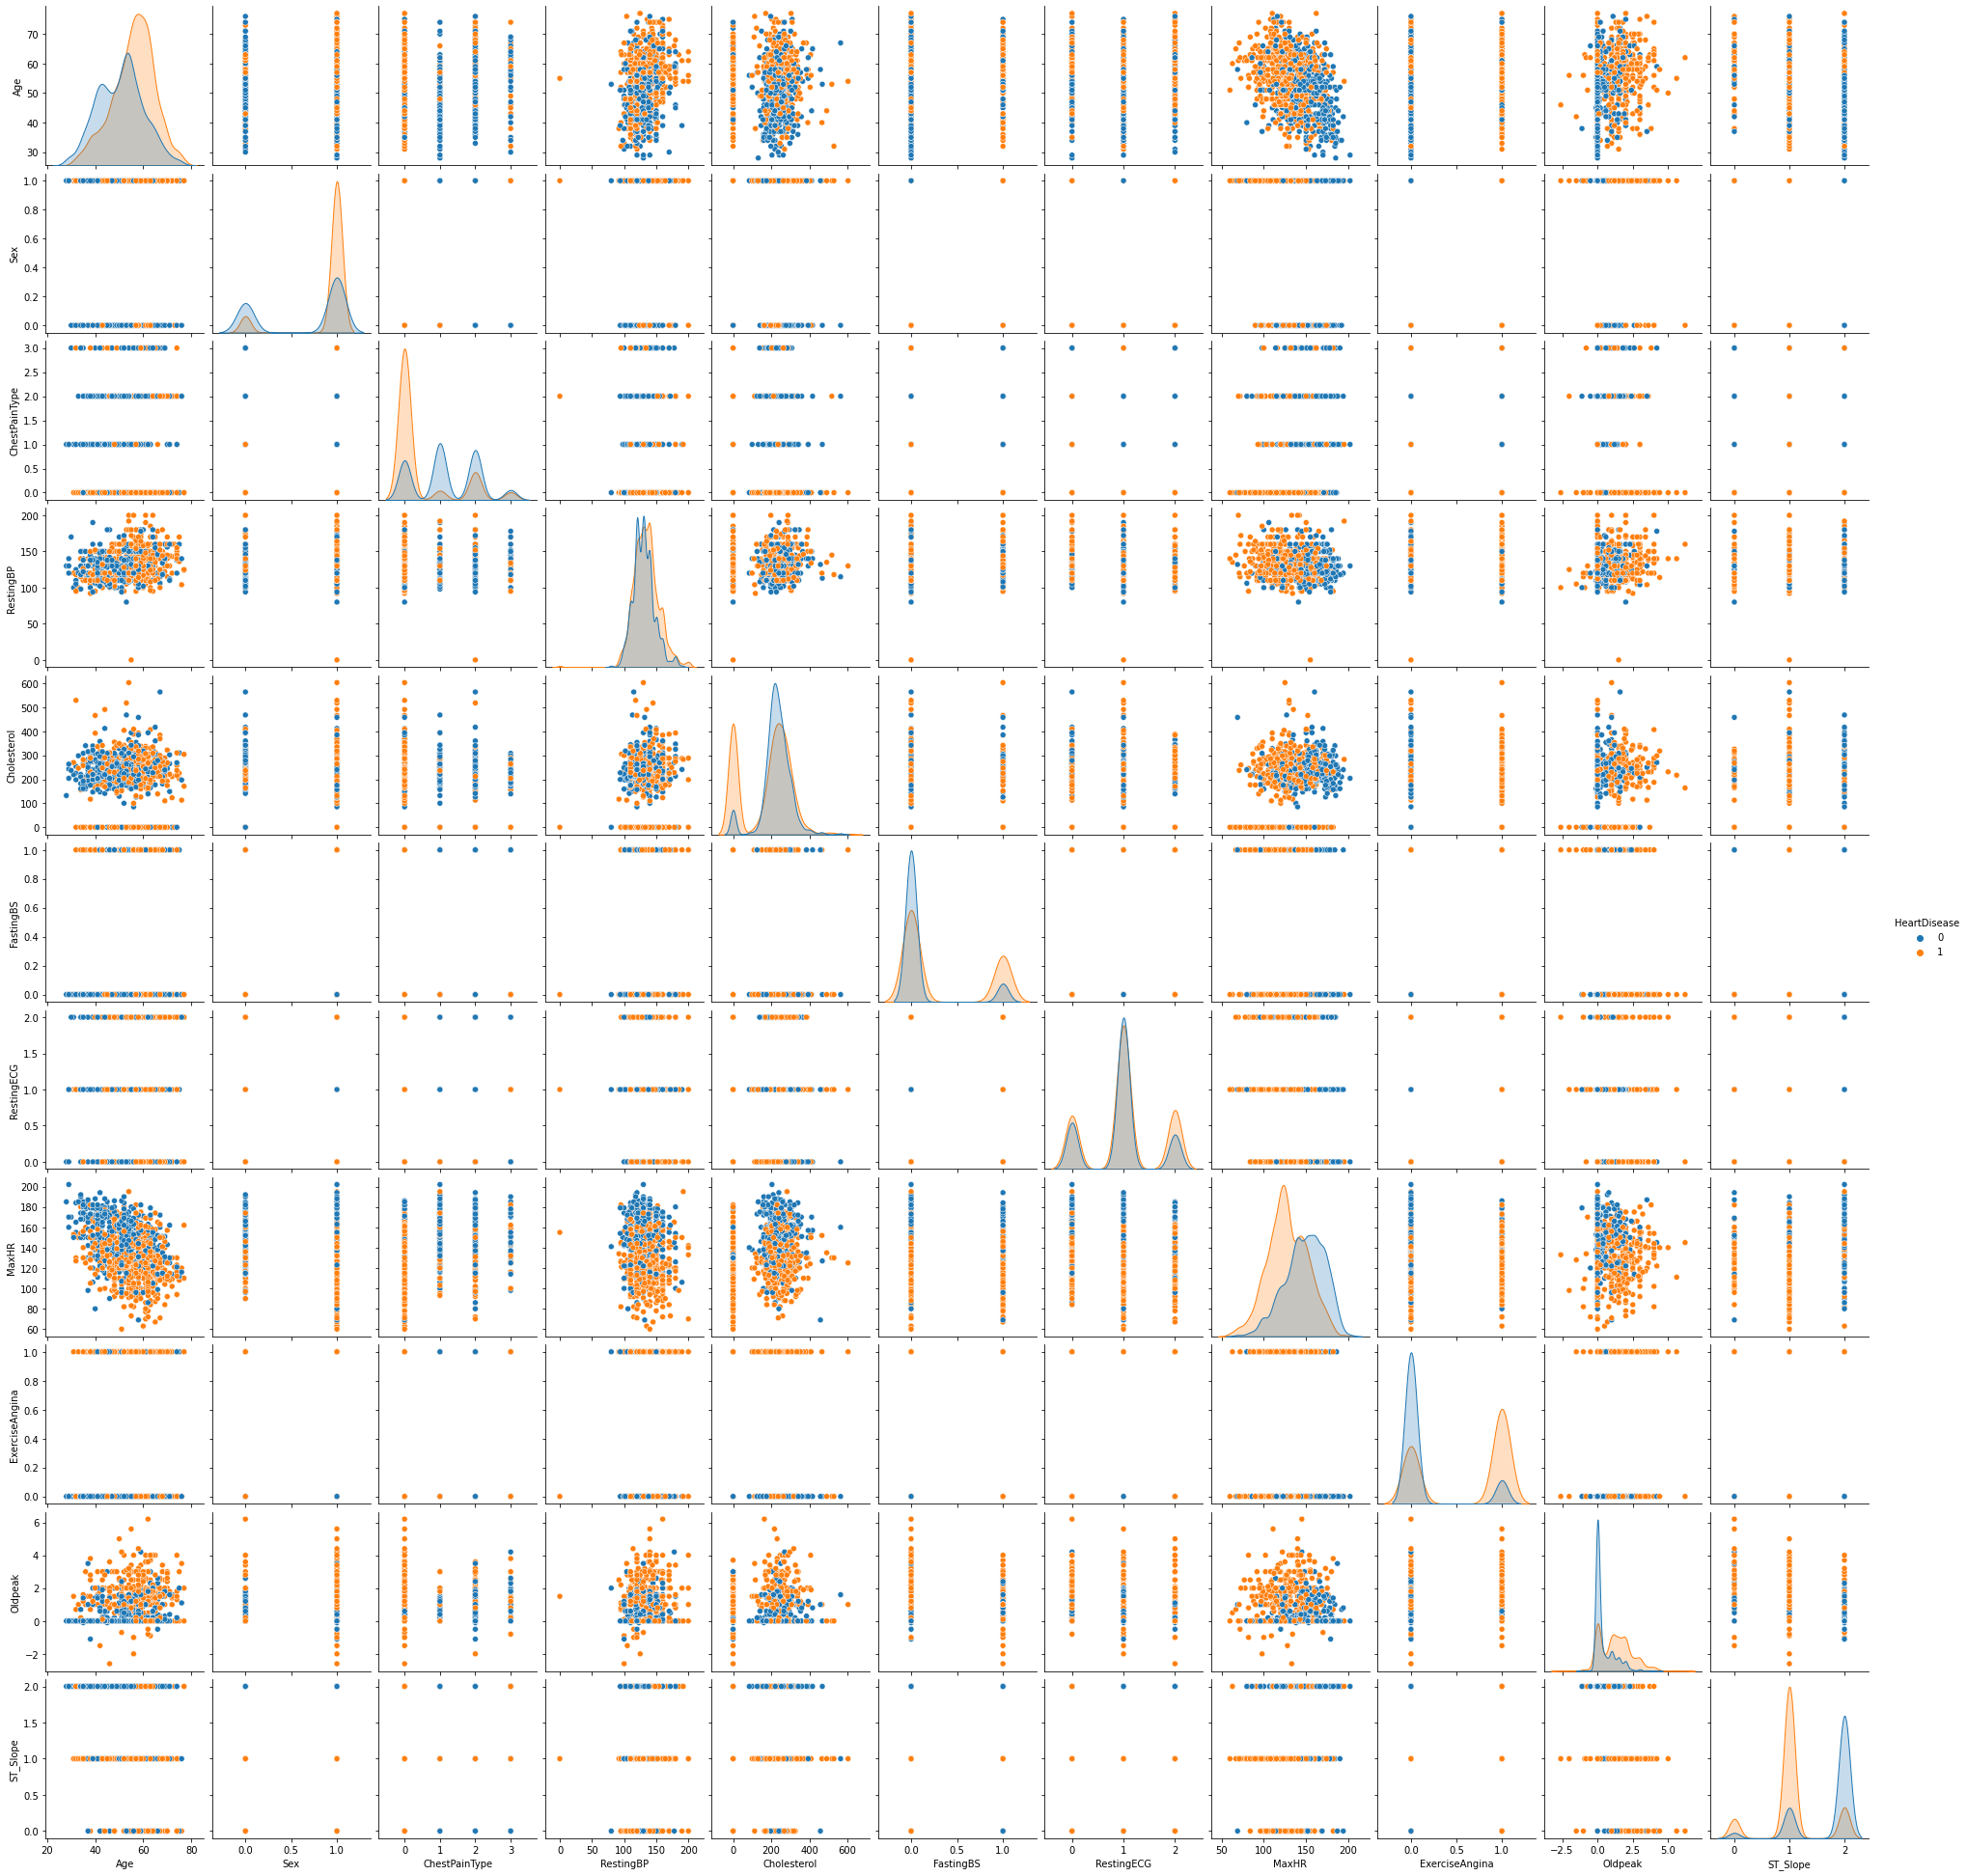

In [10]:
sns.pairplot(d, hue="HeartDisease", diag_kws={'bw': 0.2})

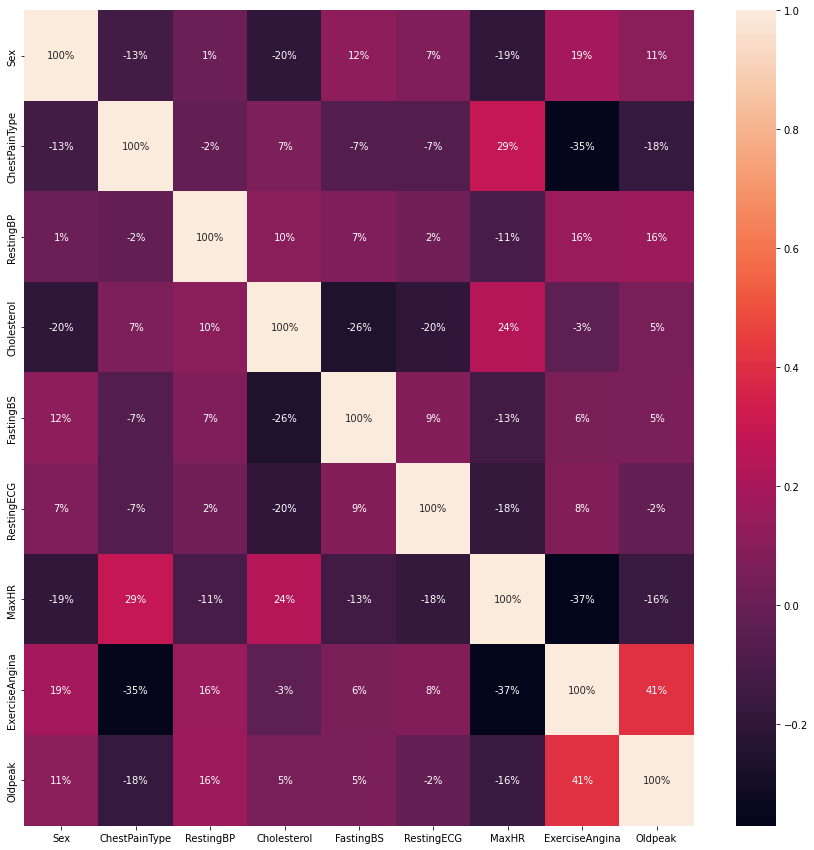

In [15]:
plt.figure(figsize=(15,15))
sns.heatmap(d.iloc[:,1:10].corr(),annot=True,fmt=".0%")

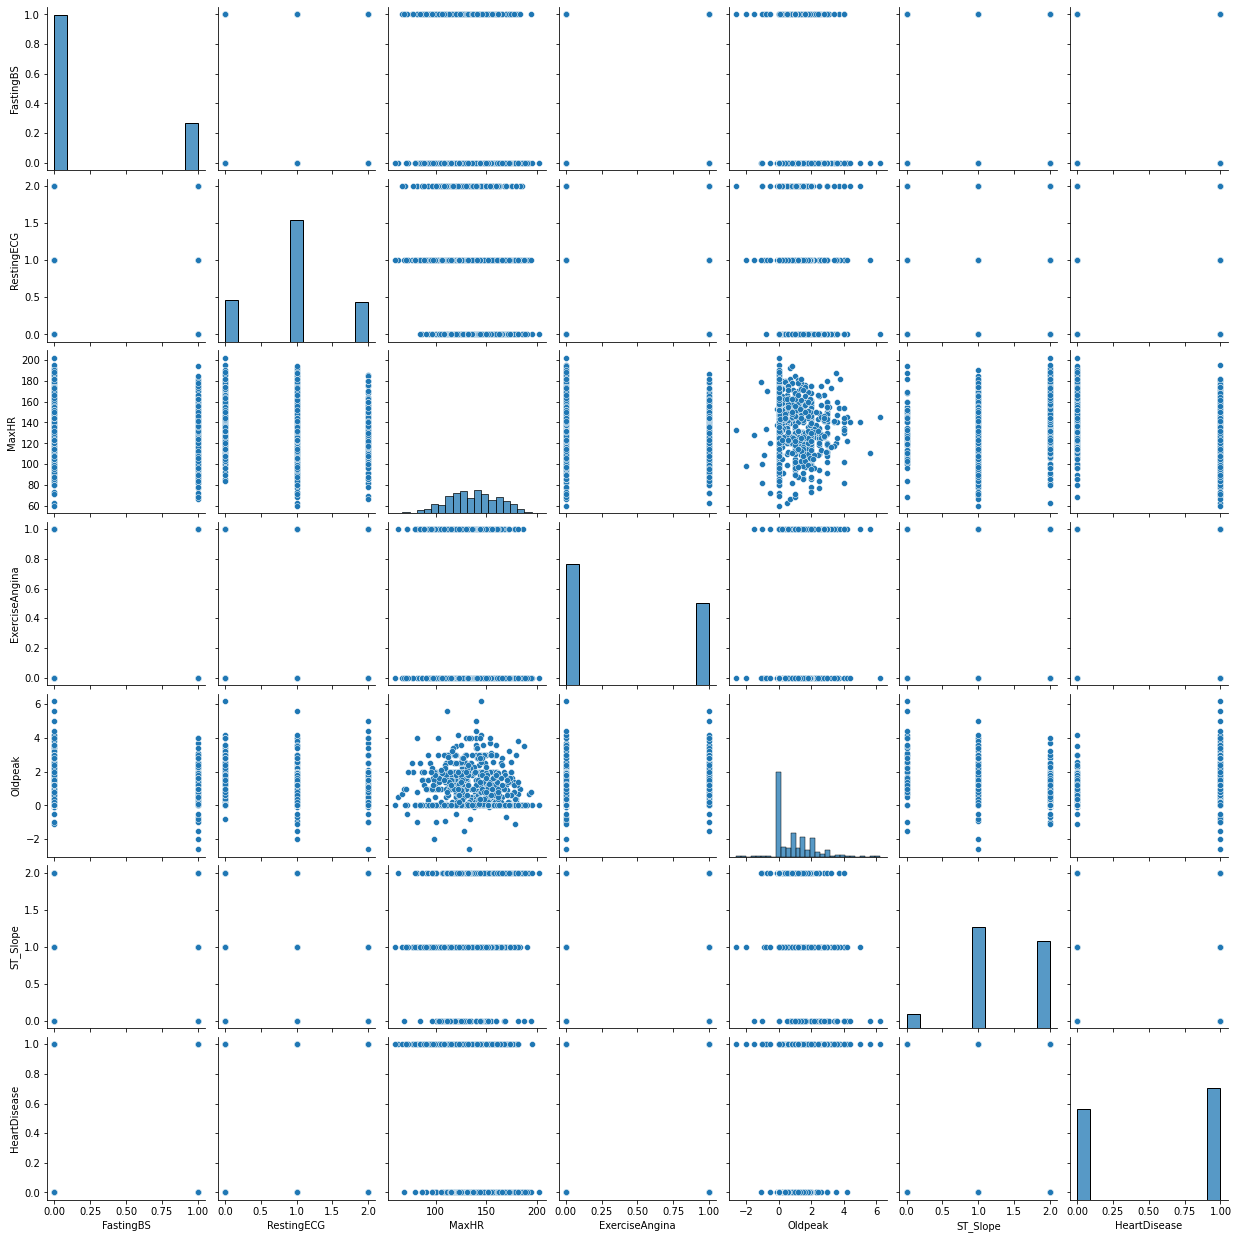

In [29]:
sns.pairplot(d.iloc[:, 5:])

In [30]:
logistic=LogisticRegression()
decision=DecisionTreeClassifier()
randomforest=RandomForestClassifier(n_estimators=100, criterion = 'gini', random_state=1)
knn=KNeighborsClassifier()
svm=SVC(probability=True)

In [31]:
models=[logistic,decision,randomforest,knn,svm]

In [32]:
xdf=d.drop("HeartDisease",axis=1)
ydf=d["HeartDisease"]
x_train,x_test,y_train,y_test=train_test_split(xdf,ydf,test_size=0.35,random_state=20)

In [33]:
mms=MinMaxScaler(feature_range=(0,1))
x_train=mms.fit_transform(x_train)
x_test=mms.fit_transform(x_test)
x_train=pd.DataFrame(x_train)
x_test=pd.DataFrame(x_test)

In [36]:
for i in range(1):
    name=['Logistic Regression', 'Decision Tree', 'Random Forest',  'KNN', 'SVM']
    acc=[]
    mae=[]
    for algo in models:
        algo.fit(x_train,y_train)
        predictions=algo.predict(x_test)
        TP, FN, FP, TN = confusion_matrix(y_test,predictions,labels=[1,0]).reshape(-1)
        acy = round((TP+TN)/(TP+FP+TN+FN), 3)
        acc.append(round(acy*100, 2))
        mae.append(mean_absolute_error(y_test,predictions))
    data={"Model":name,"Accuracy":acc,"Mean Absolute Error":mae}
    result=pd.DataFrame(data)
    display(result)

,Model,Accuracy,Mean Absolute Error
0,Logistic Regression,85.4,0.145963
1,Decision Tree,52.2,0.478261
2,Random Forest,83.5,0.164596
3,KNN,85.4,0.145963
4,SVM,87.0,0.130435


In [41]:
def heart(Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope):
  import numpy
  import matplotlib.pyplot as plt
  import pandas as pd
  import seaborn as sns
  from sklearn.preprocessing import LabelEncoder
  from sklearn.model_selection import train_test_split
  from sklearn.preprocessing import StandardScaler
  from sklearn.tree import DecisionTreeClassifier
  from sklearn.metrics import r2_score
  from sklearn.metrics import accuracy_score
  from sklearn.model_selection import train_test_split
  from sklearn.linear_model import LinearRegression
  from sklearn.linear_model import LogisticRegression
  from sklearn.tree import DecisionTreeClassifier
  from sklearn.ensemble import RandomForestClassifier
  from sklearn.linear_model import Lasso
  from sklearn.neighbors import KNeighborsClassifier
  from sklearn.svm import SVC
  from sklearn.preprocessing import MinMaxScaler
  from sklearn.ensemble import RandomForestRegressor
  d=pd.read_csv("https://raw.githubusercontent.com/akarshsnair/Dataset-cart/main/heart.csv")
  for col in d.columns:
      if d[col].dtype == 'object':
          d[col] = LabelEncoder().fit_transform(d[col])
  svm=SVC(probability=True)
  xdf=d.drop("HeartDisease",axis=1)
  ydf=d["HeartDisease"]
  x_train,x_test,y_train,y_test=train_test_split(xdf,ydf,test_size=0.35,random_state=20)
  mms=MinMaxScaler(feature_range=(0,1))
  x_train=mms.fit_transform(x_train)
  x_test=mms.fit_transform(x_test)
  x_train=pd.DataFrame(x_train)
  x_test=pd.DataFrame(x_test)
  svm=SVC(probability=True)
  svm.fit(x_train,y_train)
  predictions=svm.predict(x_test)
  data = {'Age':Age,'Sex':Sex,'Chest Pain Type':ChestPainType,'Resting Blood Pressure':RestingBP,'Cholesterol level ':Cholesterol,'Fasting Blood Sugar':FastingBS,'Resting E.C.G':RestingECG,'Maximum Heart Rate achieved ':MaxHR,'Exercise induced Angina ':ExerciseAngina,'Old peak':Oldpeak,'ST_Slope':ST_Slope}
  index = [0]
  cust_df = pd.DataFrame(data, index)
  costpredLog = svm.predict(cust_df)
  if costpredLog ==0:
    Prediction = "There is less chance for the patient to catch with heart disease"
  else:
    Prediction = "There is more of a chance for the patient to catch heart disease."
  return  Prediction
  

In [42]:
iface = gr.Interface(fn = heart,
                     
inputs =['number','number','number','number','number','number','number','number','number','number','number'],

outputs =['text'],

title="Onset of Cancer prediction",

description ='''    Description
 

''',

article=''' article

''')

iface.launch(debug = True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().

Using Embedded Colab Mode (NEW). If you have issues, please use share=True and file an issue at https://github.com/gradio-app/gradio/
Note: opening the browser inspector may crash Embedded Colab Mode.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

Keyboard interruption in main thread... closing server.


(<gradio.routes.App at 0x7fba134266d0>, 'http://127.0.0.1:7860/', None)